In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

import traceback
import os

C:\Users\20211575\Anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\20211575\Anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
DEBUG=True
batch_size=64
shuffle_flag=False if DEBUG else True
random_seed=1
if DEBUG:
    torch.manual_seed(random_seed)

train_data=torchvision.datasets.MNIST("./data",train=True,download=True,transform=torchvision.transforms.ToTensor())
test_data=torchvision.datasets.MNIST("./data",train=False,download=True,transform=torchvision.transforms.ToTensor())# Warning: ToTensor will divide the original data by 255
train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=shuffle_flag,) 
test_loader=DataLoader(test_data,batch_size=batch_size,shuffle=shuffle_flag)

Text(0.5, 1.0, 'digit 5')

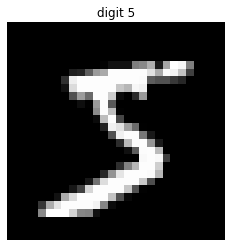

In [3]:
plt.imshow(train_data.data[0].detach().numpy(),cmap="gray")
plt.axis("off")
plt.title("digit {}".format(train_data.targets[0].detach().numpy()))

In [4]:
from ConvNetwork import ConvNet
from Trainer import train

In [5]:
input_size_2d=np.array(train_data.data[0].shape)
model=ConvNet(input_size_2d,10)

In [6]:
# Define hyperparamters, optimizers and loss_function
EPOCHES=20
lr=0.01
momentum=0.5
optimizer=optim.SGD(model.parameters(),lr=lr,momentum=momentum)
loss_func=nn.CrossEntropyLoss() # Combined LogSoftmax() and NLL_Loss()

In [7]:
save_path="./result"
if not os.path.exists(save_path):
    os.mkdir(save_path)
recorded_message=train(model,train_loader,test_loader,optimizer,loss_func,3,PATH="result",checkpoint_interval=2)

Train Epoch:1/3 	 Average Loss: 2.136037ss: 1.570756


In [18]:
def draw_loss(ax,epoch,loss,label):
    ax.plot(epoch,loss,label=label)
    ax.set_title("loss")
    return ax

def draw_lr(ax,epoch,learning_rate,label):
    ax.plot(epoch,learning_rate,label=label)
    ax.set_title("learning rate")
    return ax

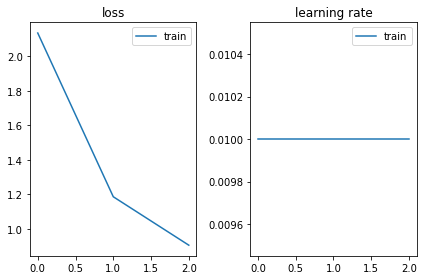

In [24]:
fig=plt.figure()
axes=fig.subplots(1,2)
train_loss=np.array(recorded_message["loss"]["train_loss"])
learning_rate=np.array(recorded_message["lr"])
draw_loss(axes[0],train_loss[:,0],train_loss[:,1],"train")
draw_lr(axes[1],learning_rate[:,0],learning_rate[:,1],"train")
for ax in axes:
    ax.legend()
fig.tight_layout()